In [1]:
from functions import *
from agent import *
from collaborate_rescue import *

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from functools import reduce
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [8]:
# 对所有参数组合进行仿真实验
# 参数展开顺序是 w ita delta，参数排列顺序是形参位置
coefs = [[z, y, x] for x in [0, 0.5, 1] for y in [0.25, 0.75] for z in [0.25, 0.75]]
coefs = np.array(coefs) # [delta, ita, w]

实验

In [9]:
# 实验
# 16行，5列，每一行代表一次实验
task_counts = []
human_actions = []
for coef in coefs:
    filename = ' '.join([str(x) for x in [coef[2], coef[0], coef[1]]])+'.csv'
    df = pd.read_csv('result/q/'+filename).loc[1:]
    
    # 1. 人类行为策略熵
    human_action = []
    for i in range(5):
        p = df.loc[0:20*(i+1), 'h_action']
        stat = p.value_counts()
        prob = stat/stat.sum()
        prob = -prob * np.log(prob)
        ent = prob.sum()
        human_action.append(ent)
    human_actions.append(human_action)
    
    # 2， 任务数量
    task_count = []
    for i in range(5):
        t = df.loc[20*i+1:20*(i+1), 'task_count']
        task_count.append(t.sum())
    task_counts.append(task_count)


    
# 3. human_trust
a = '-4	-5	3	4	-4	0	-1	-8	-7	-4	-8	-8	-3	-6	3	4	-2	-5	2	3	-4	2	-8	-4	-5	-6	-1	-2	-6	-2	-1	2	7	4	-8	2'
a = a.split('\t')
human_trusts = np.array(a).reshape(3, 12).astype('int').transpose()

In [79]:
# 备份
pd.DataFrame(np.array(human_actions).T).to_csv('result/human_ent.csv', index=None)
pd.DataFrame(np.array(task_counts).T).to_csv('result/task_count.csv', index=None)

In [12]:
np.array(human_actions).shape

(12, 5)

仿真

In [15]:
# 参数搜索
for c1 in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    for c2 in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
        
        print('try:', c1, c2)
        coefs = [[z, y, x] for x in [0, 0.5, 1] for y in [c1, c1+0.1] for z in [c2, c2+0.1]] # z-delta y-ita
        coefs = np.array(coefs) # [delta, ita, w]

        # 仿真
        # 生成数据及备份
        for coef in coefs:
            filename = ' '.join([str(x) for x in [coef[2], coef[0], coef[1]]])+'.csv'
            coef_1  = coef.copy()
            coef_1[2] = 1-coef_1[2]
            collaborate_rescue_1(*tuple(coef_1)).to_csv('simu_result/cal/'+filename, index=None)

        # 实验
        # 16行，5列，每一行代表一次实验
        task_counts_1 = []
        human_actions_1 = []
        human_trusts_1 = []
        for coef in coefs:
            filename = ' '.join([str(x) for x in [coef[2], coef[0], coef[1]]])+'.csv'
            df = pd.read_csv('simu_result/cal/'+filename).loc[1:]

            # 1. 人类行为策略熵
            human_action = []
            for i in range(5):
                p = df.loc[0:20*(i+1), 'human_actions']
                stat = p.value_counts()
                prob = stat/stat.sum()
                prob = -prob * np.log(prob)
                ent = prob.sum()
                human_action.append(ent)
            human_actions_1.append(human_action)

            # 2. 人类信任
            human_trust = []
            for i in range(3):
                tru = df.loc[30*i+1:30*(i+1), 'human_trust']
                human_trust.append(trua.sum())
            human_trusts_1.append(human_trust)

            # 3， 任务数量
            task_count = []
            for i in range(5):
                t = df.loc[20*i+1:20*(i+1), 'task_count']
                task_count.append(t.sum())
            task_counts_1.append(task_count)

        # 备份
        pd.DataFrame(np.array(task_counts_1).T).to_csv('simu_result/cal/task_counts.csv', index=None)
        pd.DataFrame(np.array(human_actions_1).T).to_csv('simu_result/cal/human_ent.csv', index=None)
        pd.DataFrame(np.array(human_trusts_1).T).to_csv('simu_result/cal/human_trusts.csv', index=None)

        print(print_tic(0,4).round(decimals=2))
        print(print_tic(4,8).round(decimals=2))
        print(print_tic(8,12).round(decimals=2))
        
        if (print_tic(0, 12) <= 0.3).all():
            print('#########sub best', c1, c2)
        if (print_tic(0, 4) <= 0.3).all() and (print_tic(4,8) <= 0.3).all() and (print_tic(8,12) <= 0.3).all():
            print('#########best:', c1, c2)

try: 0.1 0.1
[0.11 0.58]
[0.13 0.46]
[0.11 0.23]
try: 0.1 0.2
[0.34 0.56]
[0.12 0.51]
[0.18 0.4 ]
try: 0.1 0.3
[0.16 0.4 ]
[0.12 0.52]
[0.03 0.22]
#########sub best 0.1 0.3
try: 0.1 0.4
[0.12 0.49]
[0.16 0.52]
[0.53 0.46]
try: 0.1 0.5
[0.11 0.4 ]
[0.45 0.16]
[0.11 0.52]
try: 0.1 0.6
[0.25 0.49]
[0.11 0.37]
[0.5 0.3]
#########sub best 0.1 0.6
try: 0.1 0.7
[0.19 0.38]
[0.21 0.46]
[0.09 0.57]
try: 0.1 0.8
[0.13 0.25]
[0.06 0.35]
[0.07 0.34]
#########sub best 0.1 0.8
try: 0.1 0.9
[0.21 0.4 ]
[0.08 0.54]
[0.08 0.42]
try: 0.2 0.1
[0.24 0.21]
[0.11 0.54]
[0.08 0.35]
#########sub best 0.2 0.1
try: 0.2 0.2
[0.12 0.2 ]
[0.36 0.48]
[0.05 0.48]
try: 0.2 0.3
[0.09 0.43]
[0.21 0.4 ]
[0.52 0.36]
try: 0.2 0.4
[0.18 0.5 ]
[0.2  0.48]
[0.13 0.2 ]
#########sub best 0.2 0.4
try: 0.2 0.5
[0.14 0.49]
[0.6  0.39]
[0.16 0.42]
try: 0.2 0.6
[0.11 0.4 ]
[0.15 0.36]
[0.08 0.37]
try: 0.2 0.7
[0.24 0.46]
[0.17 0.29]
[0.12 0.34]
try: 0.2 0.8
[0.16 0.54]
[0.15 0.54]
[0.17 0.38]
try: 0.2 0.9
[0.17 0.47]
[0.1  0.19]
[0

In [16]:
coefs = [[z, y, x] for x in [0, 0.5, 1] for y in [0.25, 0.75] for z in [0.25, 0.75]]
coefs = np.array(coefs) # [delta, ita, w]

# 仿真
# 生成数据及备份
for coef in coefs:
    filename = ' '.join([str(x) for x in [coef[2], coef[0], coef[1]]])+'.csv'
    coef_1  = coef.copy()
    coef_1[2] = 1-coef_1[2]
    collaborate_rescue_1(*tuple(coef_1)).to_csv('simu_result/cal/'+filename, index=None)

# 实验
# 16行，5列，每一行代表一次实验
task_counts_1 = []
human_actions_1 = []
human_trusts_1 = []
for coef in coefs:
    filename = ' '.join([str(x) for x in [coef[2], coef[0], coef[1]]])+'.csv'
    df = pd.read_csv('simu_result/cal/'+filename).loc[1:]

    # 1. 人类行为策略熵
    human_action = []
    for i in range(5):
        p = df.loc[0:20*(i+1), 'human_actions']
        stat = p.value_counts()
        prob = stat/stat.sum()
        prob = -prob * np.log(prob)
        ent = prob.sum()
        human_action.append(ent)
    human_actions_1.append(human_action)

    # 2. 人类信任
    human_trust = []
    for i in range(3):
        tru = df.loc[30*i+1:30*(i+1), 'human_trust']
        human_trust.append(tru.sum())
    human_trusts_1.append(human_trust)

    # 3， 任务数量
    task_count = []
    for i in range(5):
        t = df.loc[20*i+1:20*(i+1), 'task_count']
        task_count.append(t.sum())
    task_counts_1.append(task_count)

# 备份
pd.DataFrame(np.array(task_counts_1).T).to_csv('simu_result/cal/task_counts.csv', index=None)
pd.DataFrame(np.array(human_actions_1).T).to_csv('simu_result/cal/human_ent.csv', index=None)
pd.DataFrame(np.array(human_trusts_1).T).to_csv('simu_result/cal/human_trusts.csv', index=None)

In [19]:
for i in range(12):
    print(tic(np.array(task_counts)[i], np.array(task_counts_1)[i]))

0.6058671322547371
1.0
0.6245771609704348
0.41421356237309503
0.3760701001237685
0.7071067811865476
0.28348486100883197
0.27116642906457433
0.31943828249996997
0.5017575616780996
0.5278640450004206
0.3628638793661061


图像

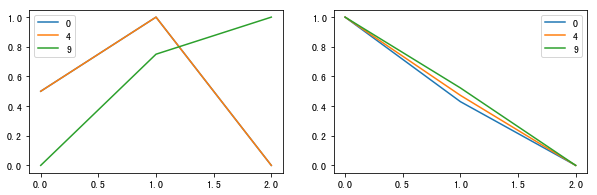

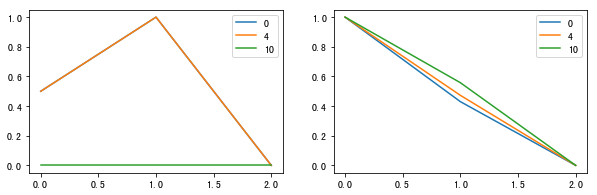

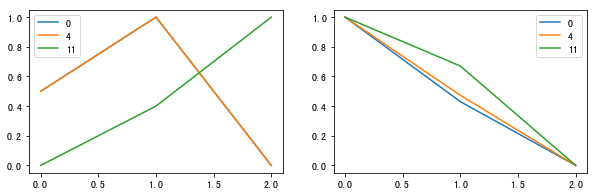

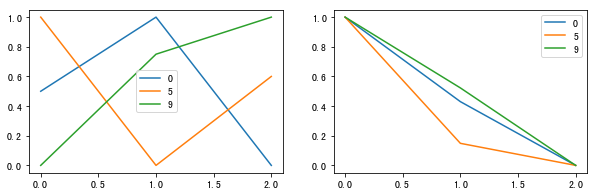

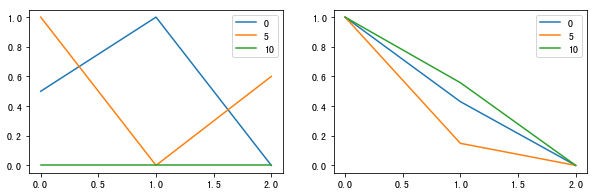

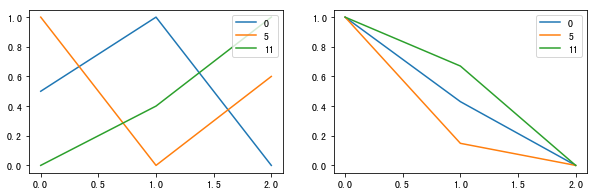

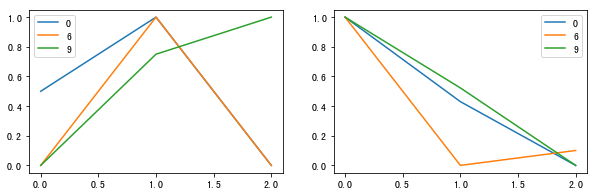

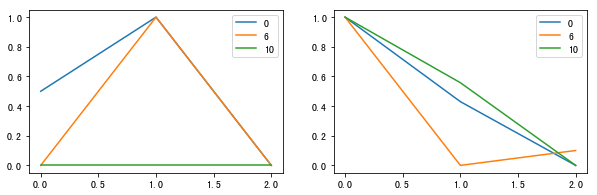

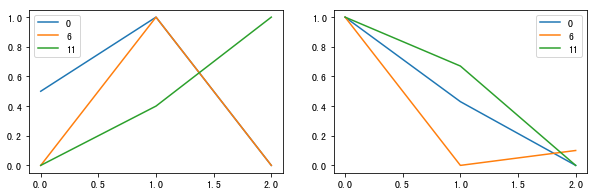

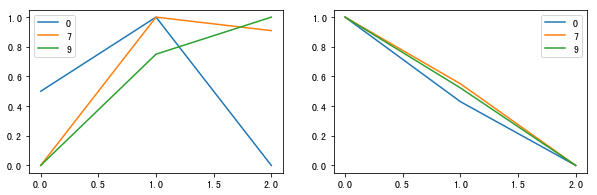

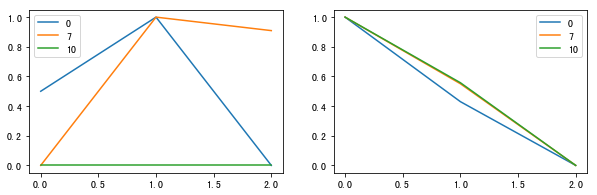

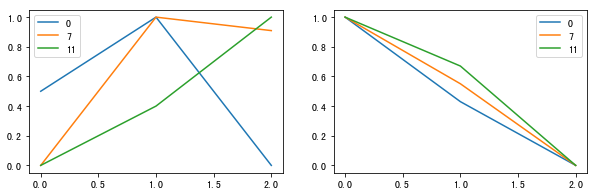

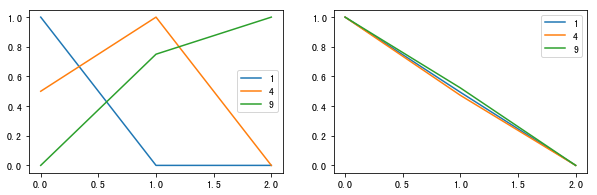

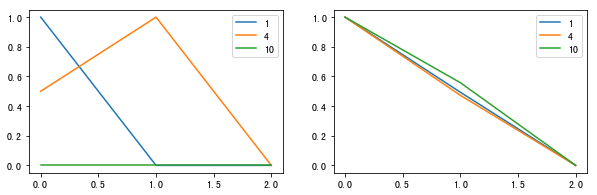

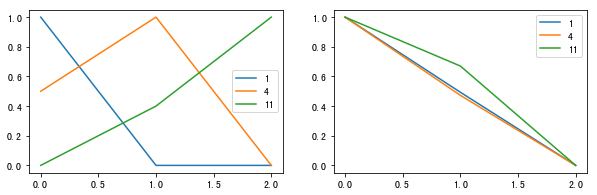

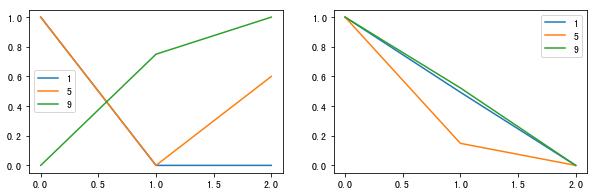

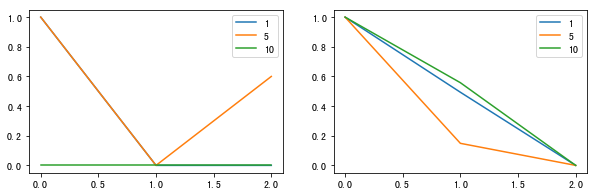

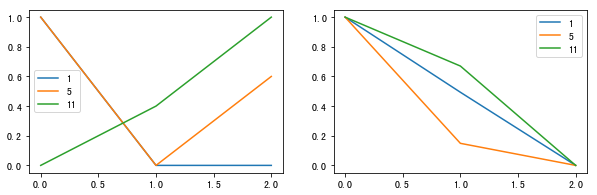

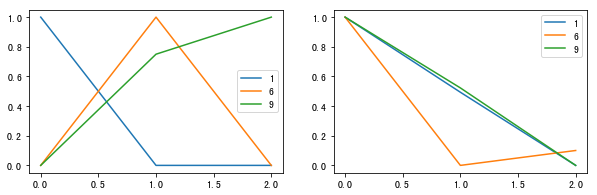

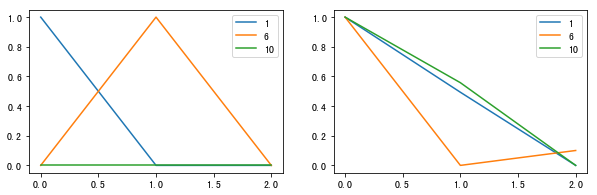

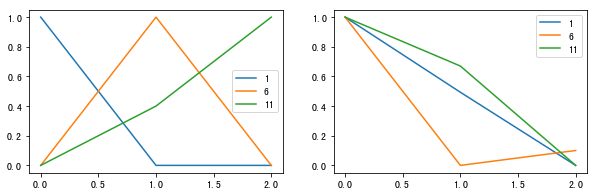

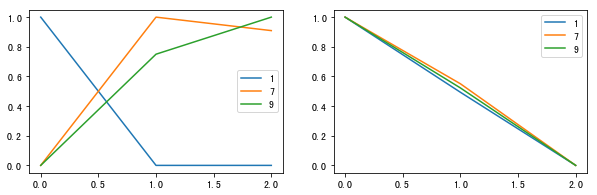

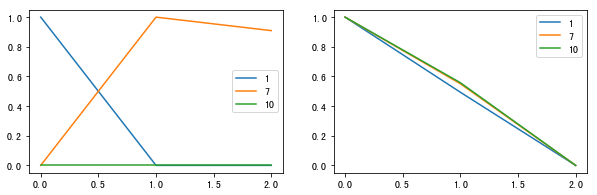

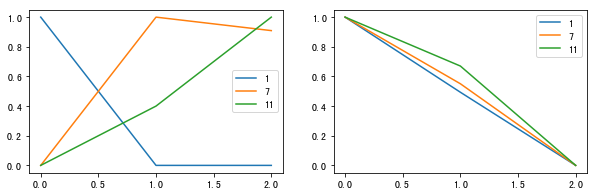

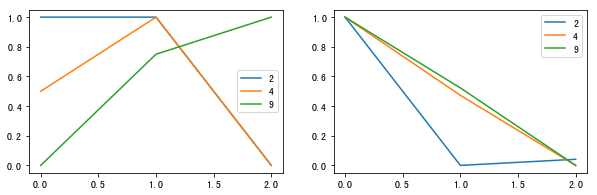

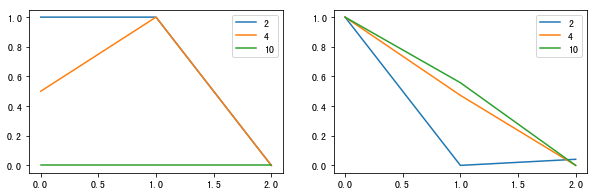

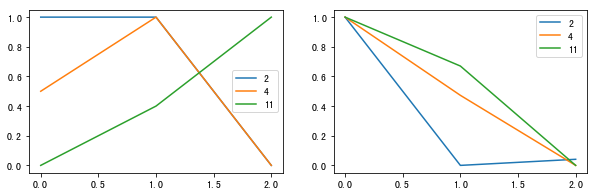

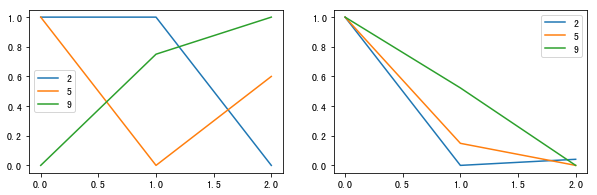

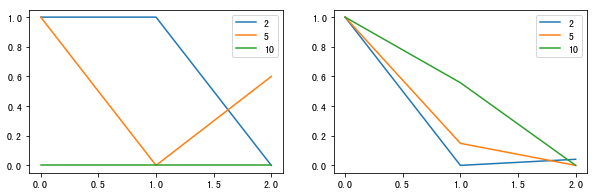

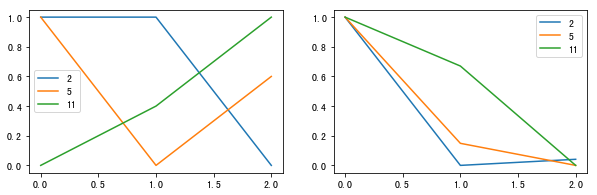

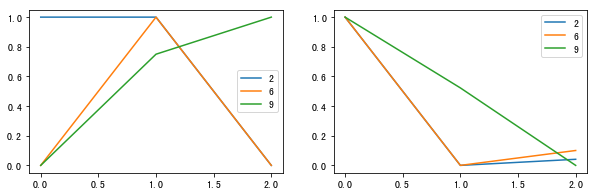

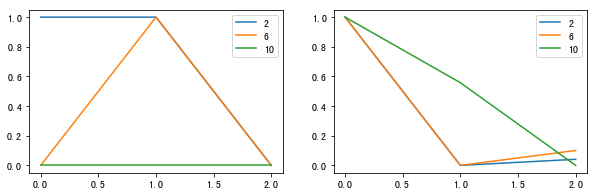

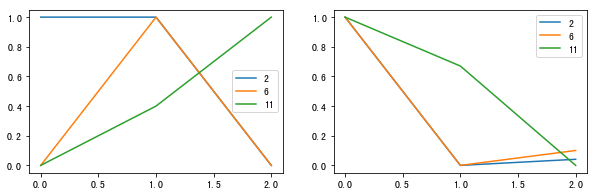

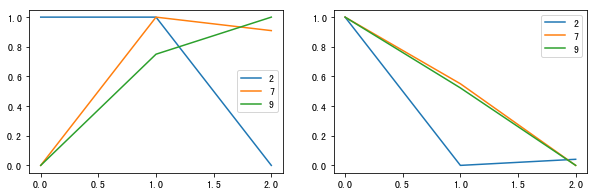

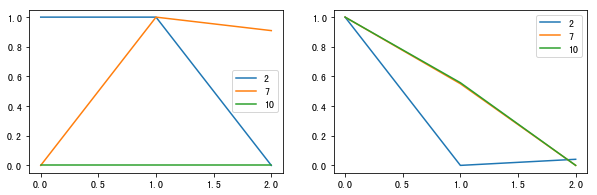

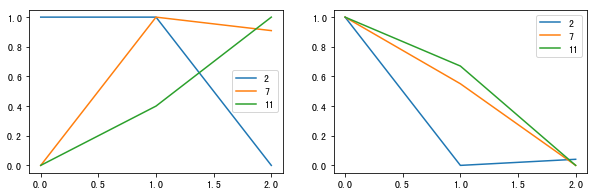

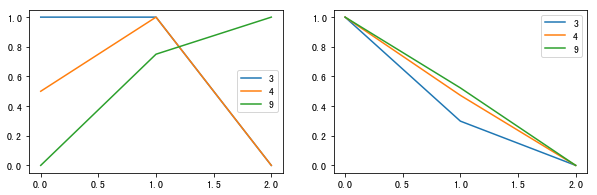

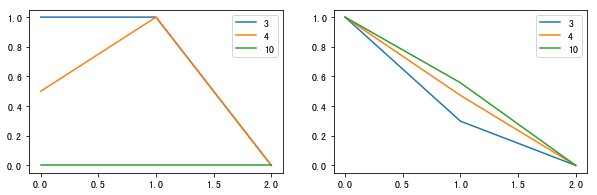

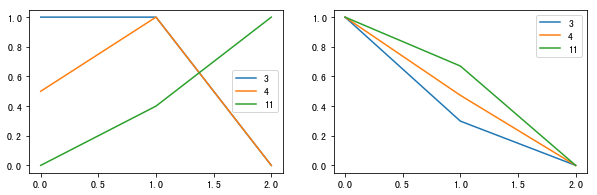

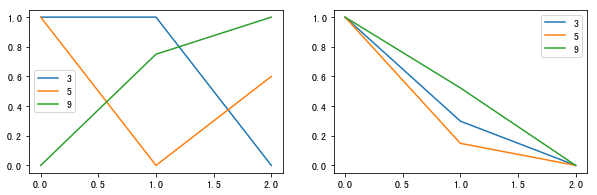

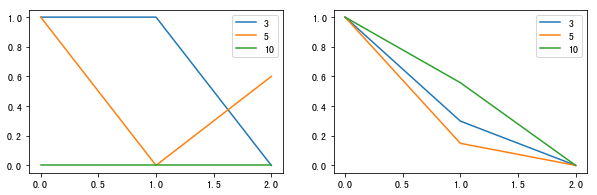

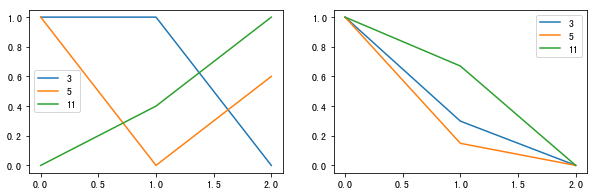

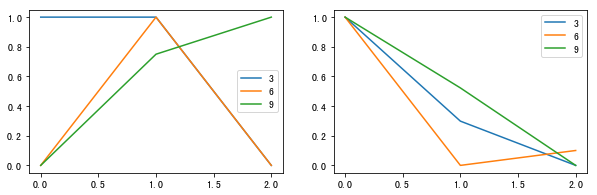

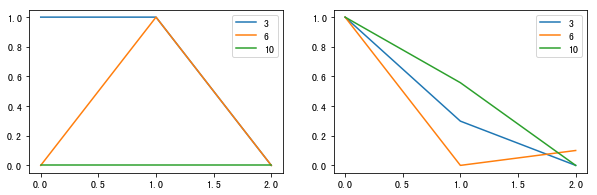

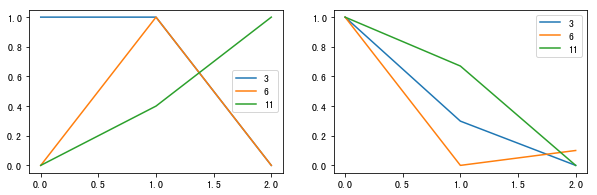

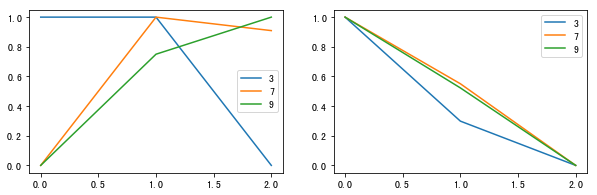

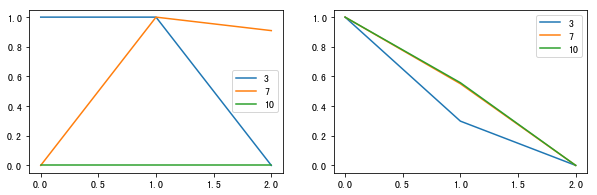

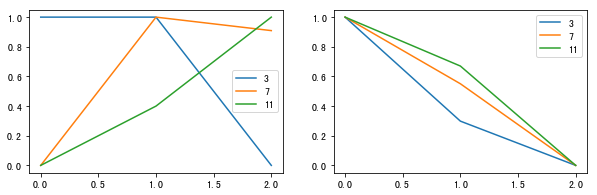

In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

for d in [[x, y, z] for x in range(4) for y in range(4, 8) for z in range(9, 12)]:
    
    fig = plt.figure(figsize=(10, 3))
    
    x1 = fig.add_subplot(1,2,1)
    data = scaler.fit_transform(human_trusts[d, :].T)
    plt.plot(data)
    plt.legend(d)

    ax2 = fig.add_subplot(1,2,2)
    data = scaler.fit_transform(np.array(human_trusts_1)[d, :].T)
    plt.plot(data)
    plt.legend(d)
    
    name = '+'.join([str(x) for x in d])
    fig.savefig('human_trusts/'+name+'.jpg')

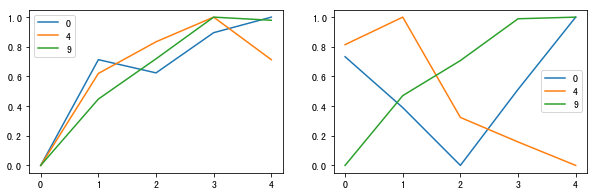

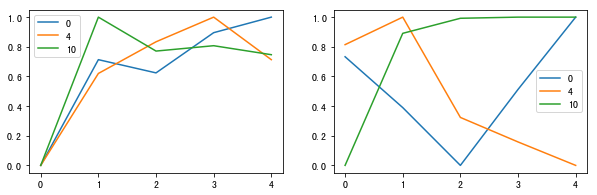

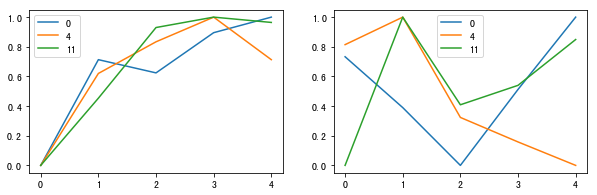

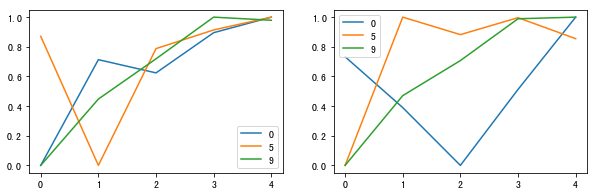

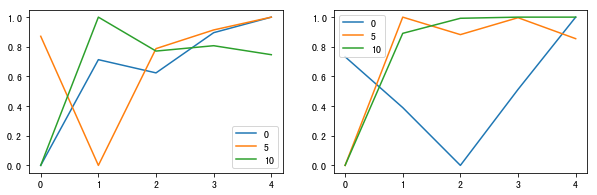

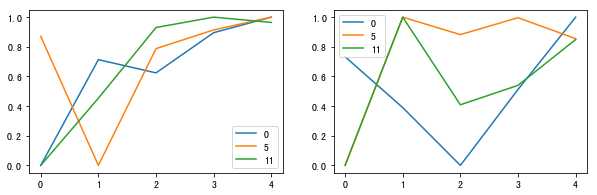

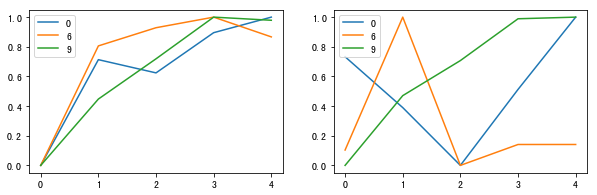

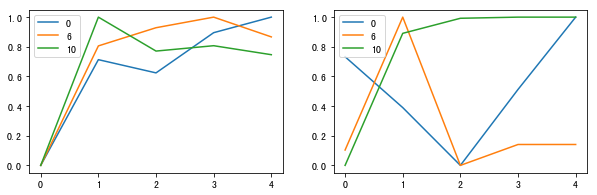

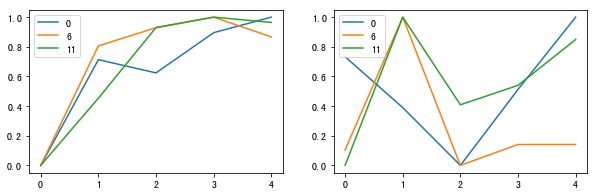

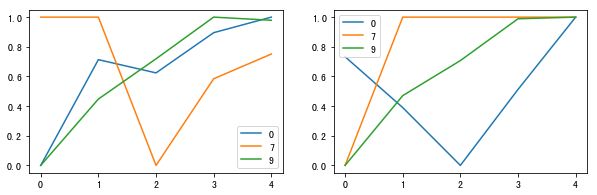

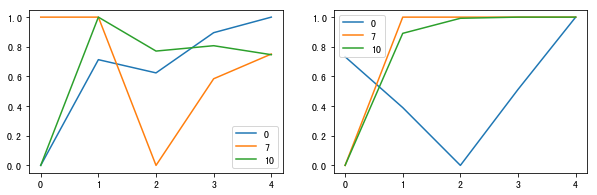

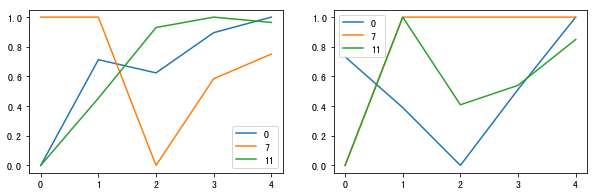

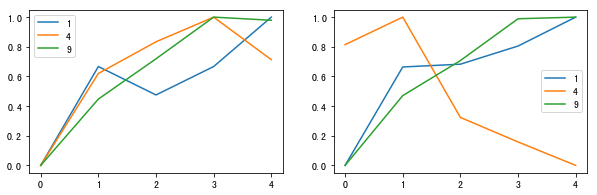

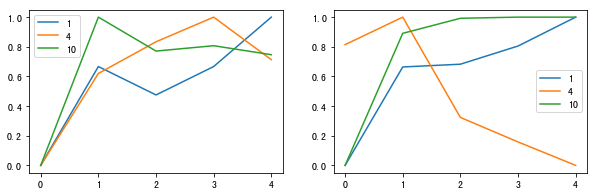

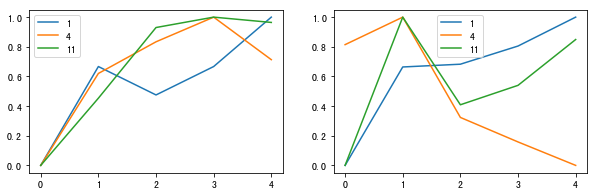

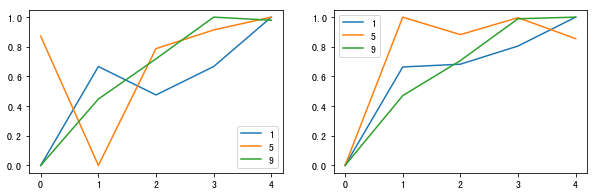

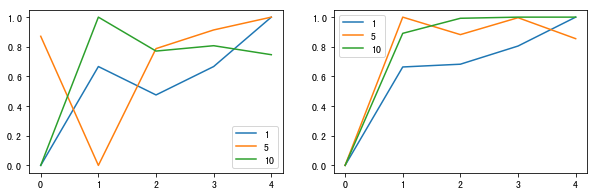

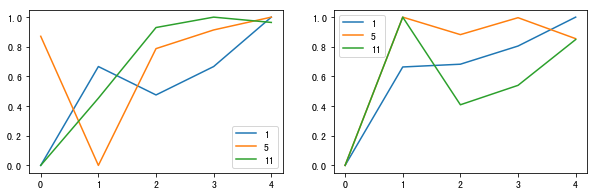

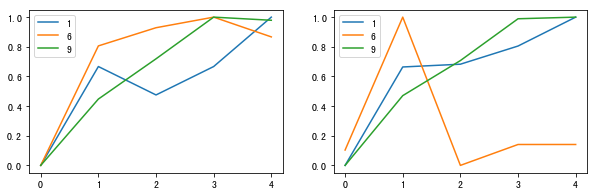

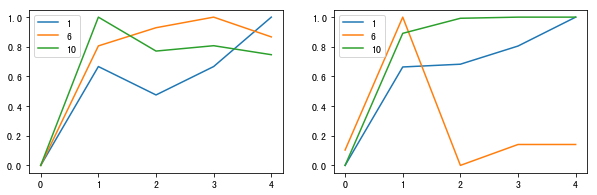

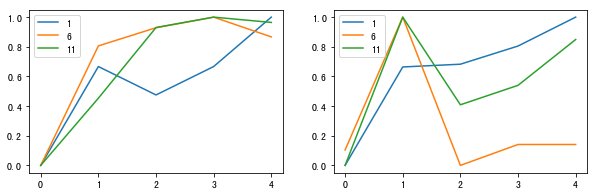

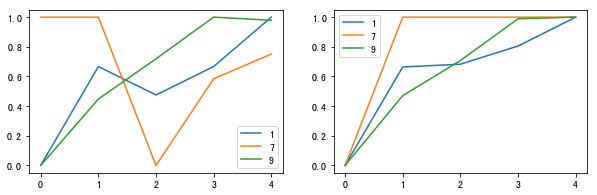

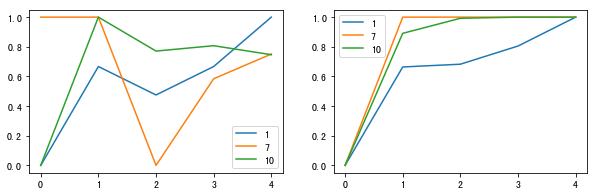

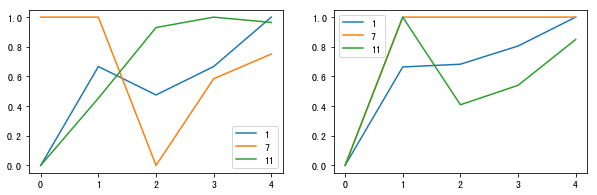

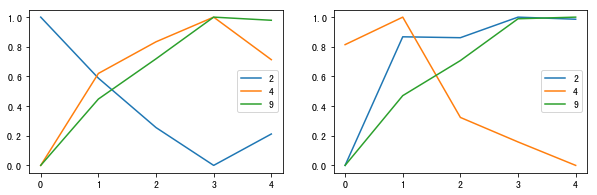

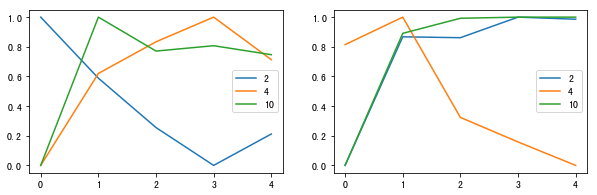

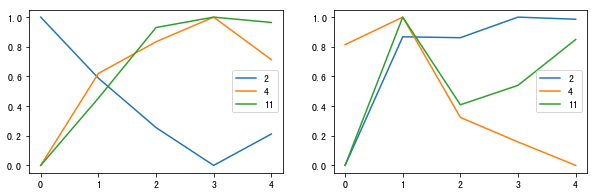

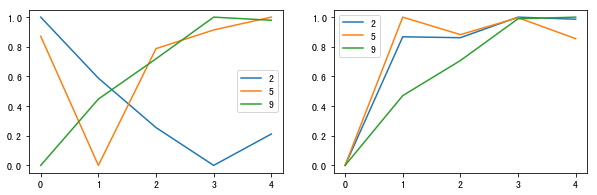

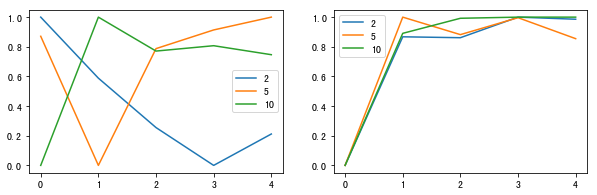

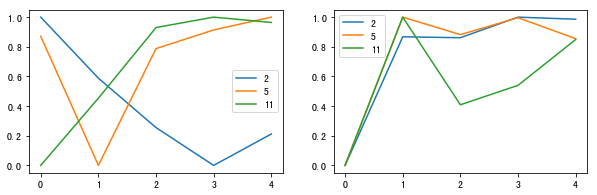

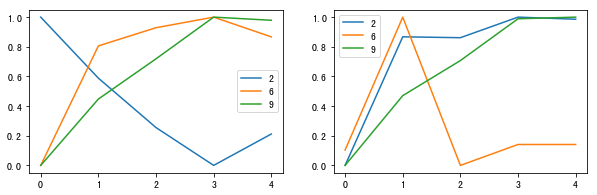

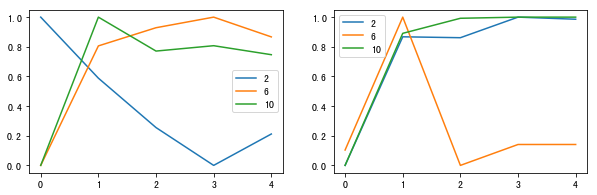

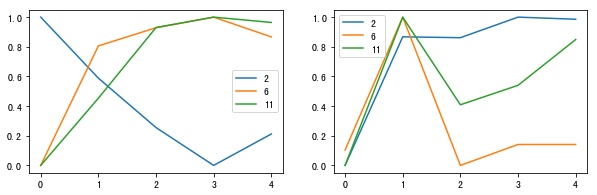

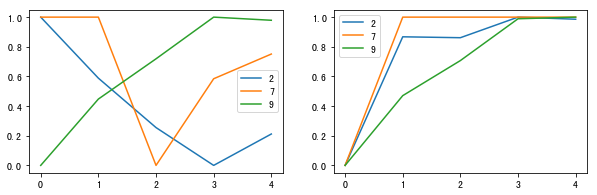

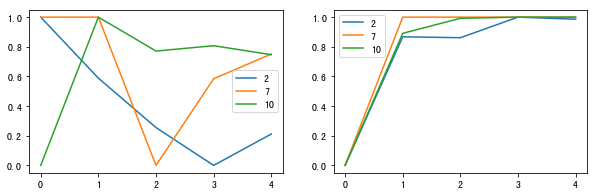

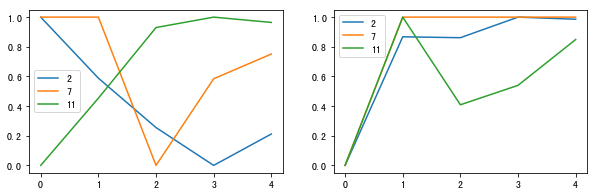

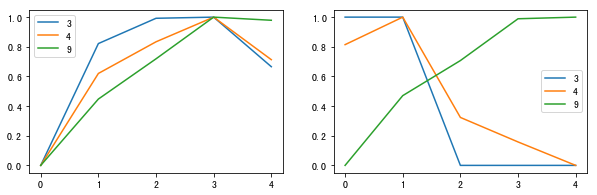

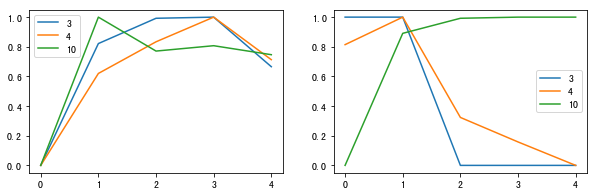

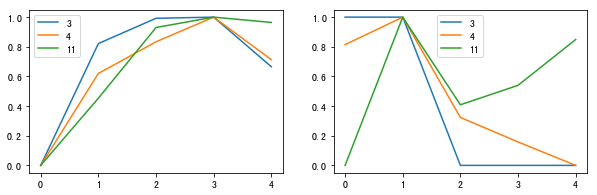

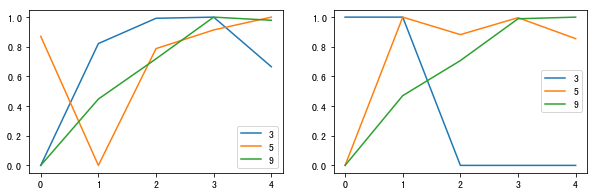

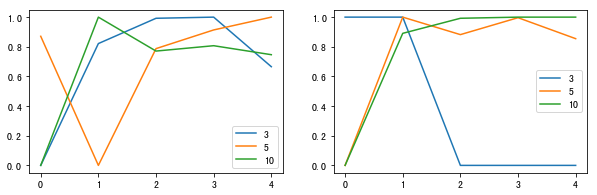

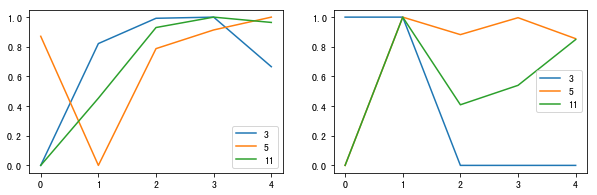

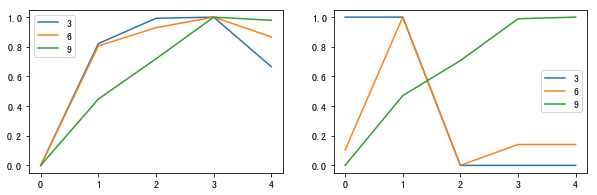

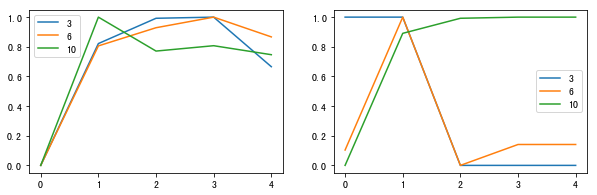

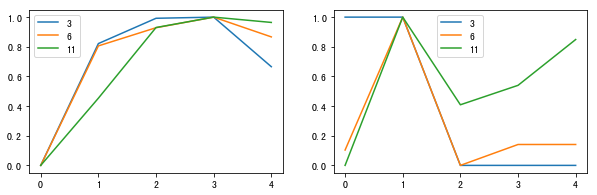

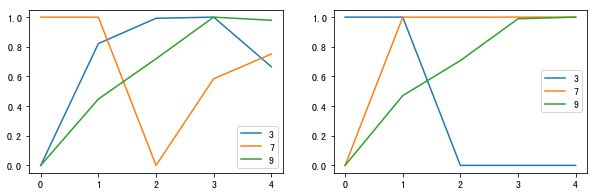

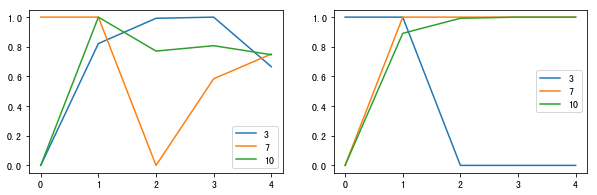

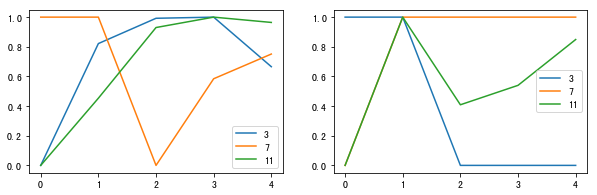

In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

for d in [[x, y, z] for x in range(4) for y in range(4, 8) for z in range(9, 12)]:
    
    fig = plt.figure(figsize=(10, 3))
    
    ax1 = fig.add_subplot(1,2,1)
    data = scaler.fit_transform(np.array(human_actions)[d, :].T)
    plt.plot(data)
    plt.legend(d)

    ax2 = fig.add_subplot(1,2,2)
    data = scaler.fit_transform(np.array(human_actions_1)[d, :].T)
    plt.plot(data)
    plt.legend(d)
    
    name = '+'.join([str(x) for x in d])
    fig.savefig('human_actions/'+name+'.jpg')

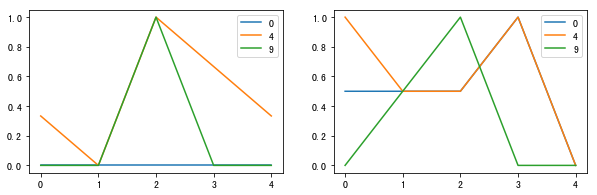

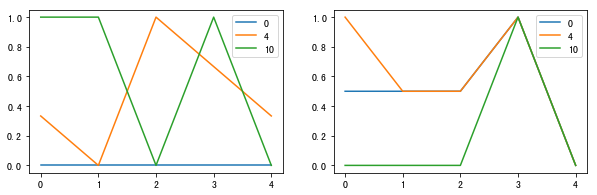

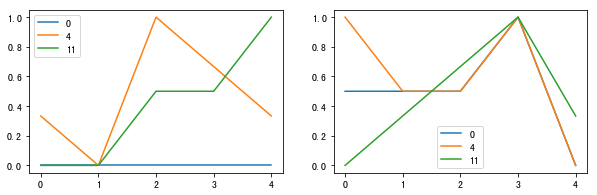

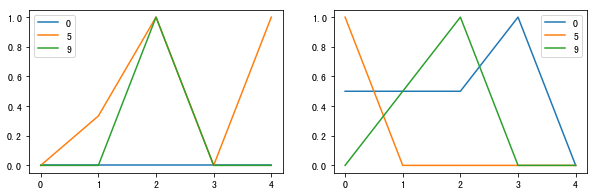

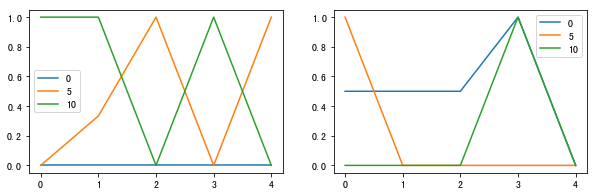

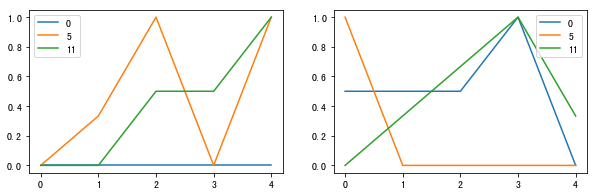

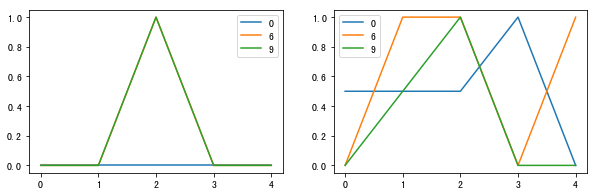

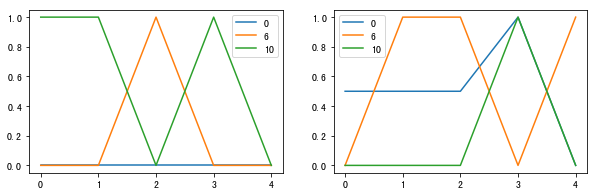

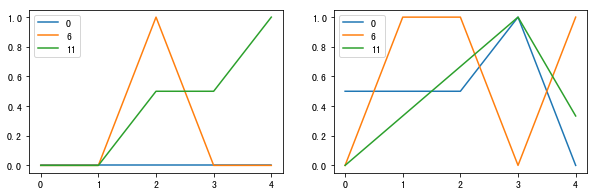

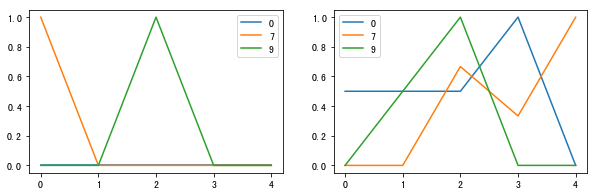

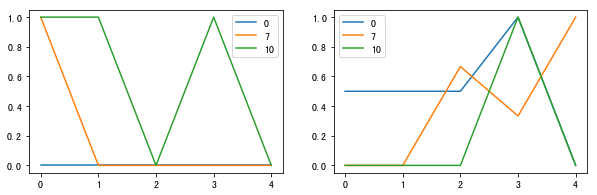

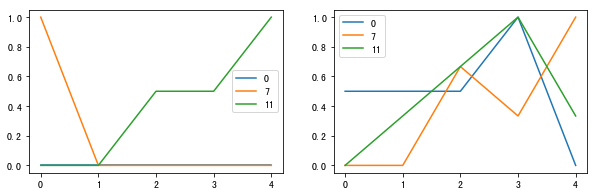

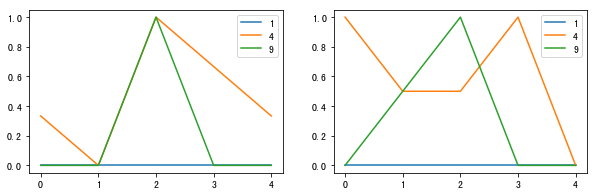

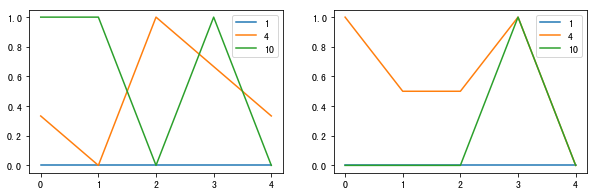

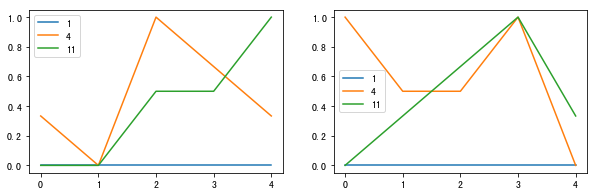

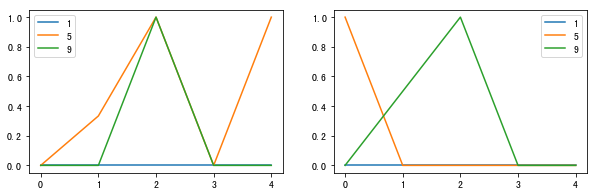

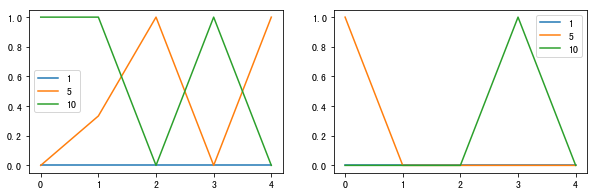

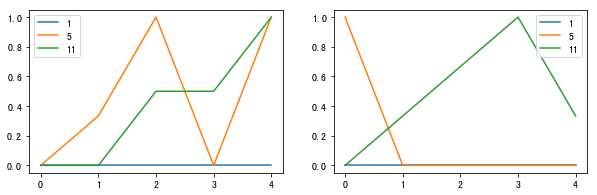

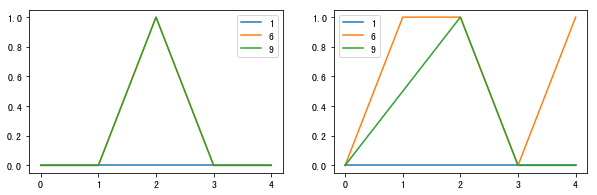

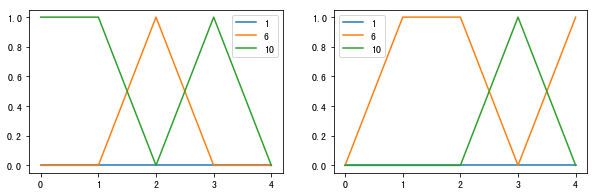

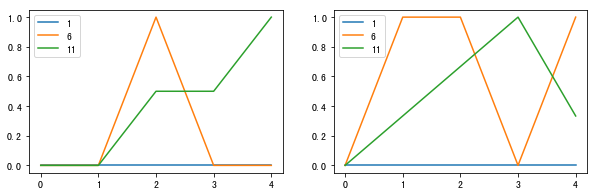

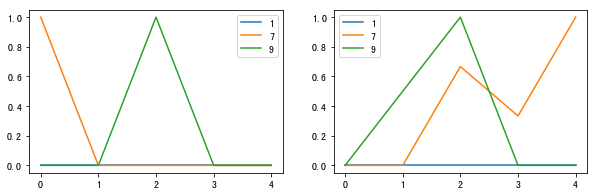

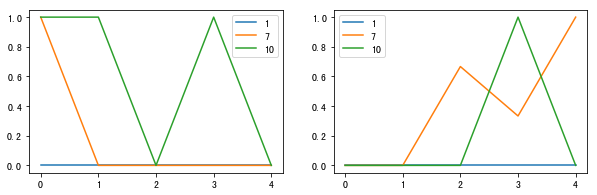

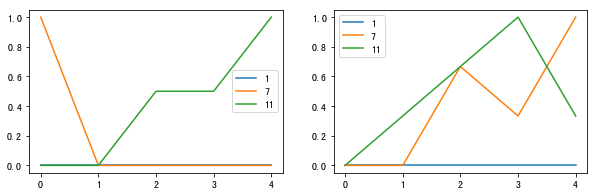

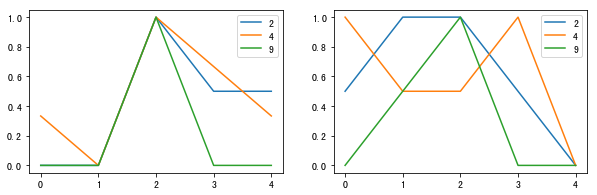

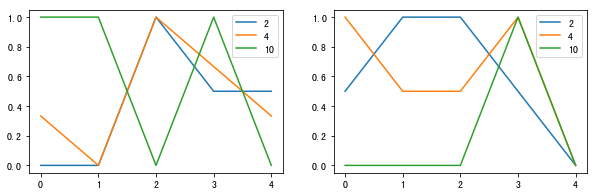

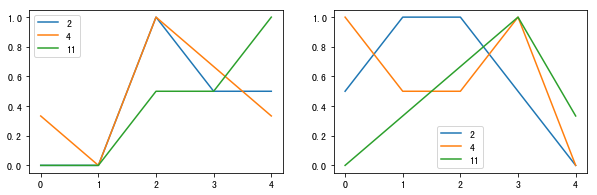

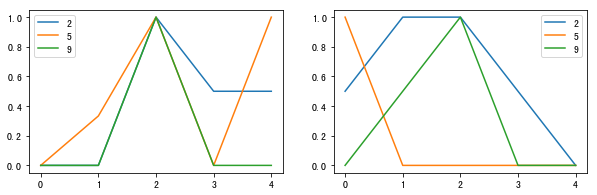

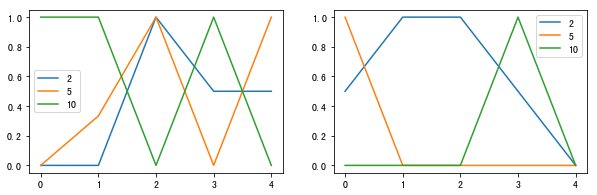

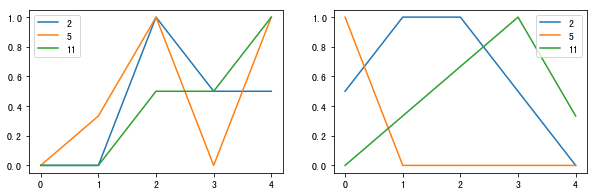

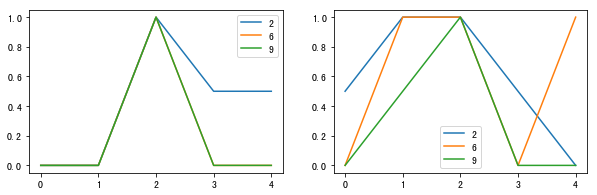

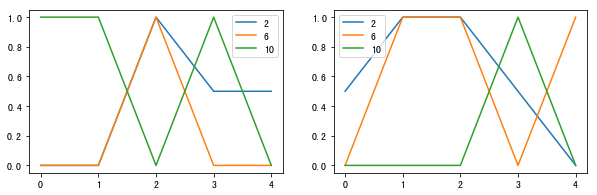

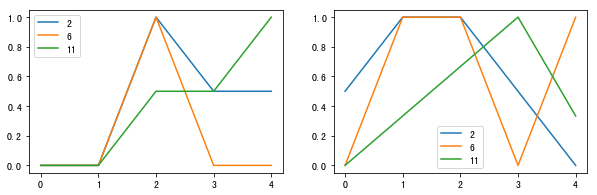

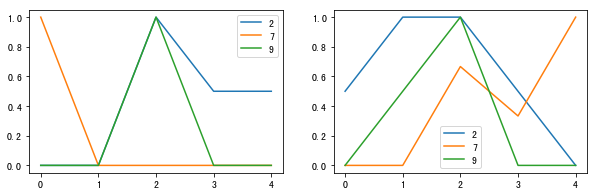

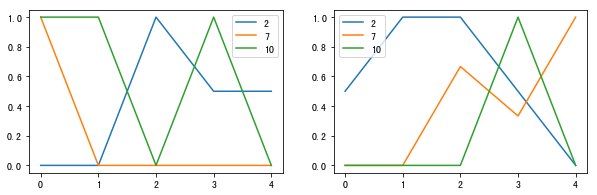

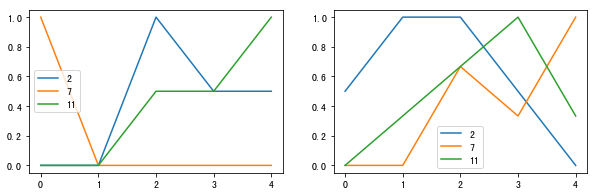

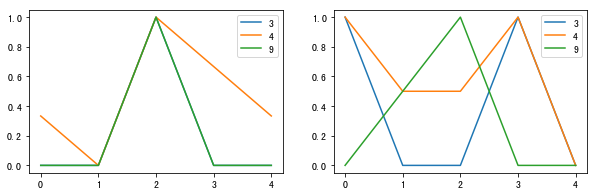

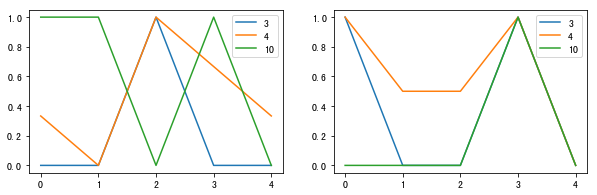

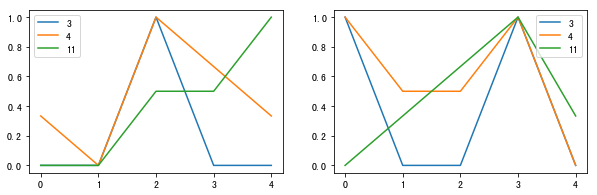

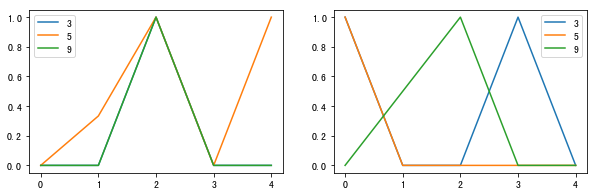

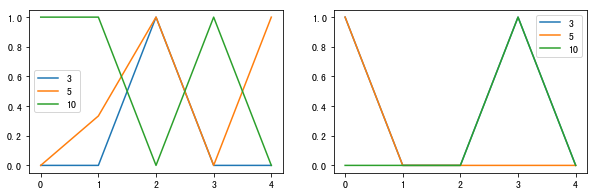

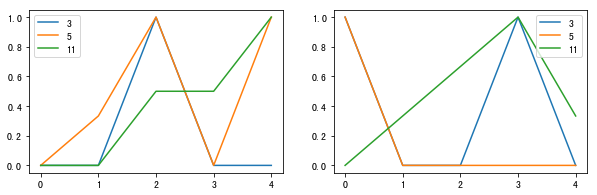

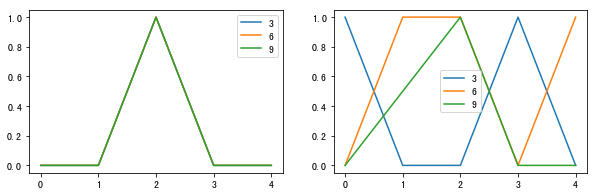

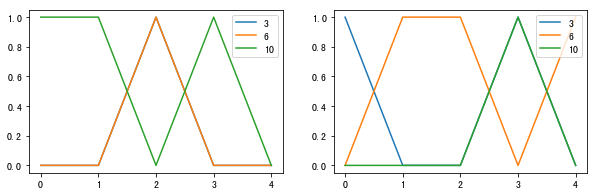

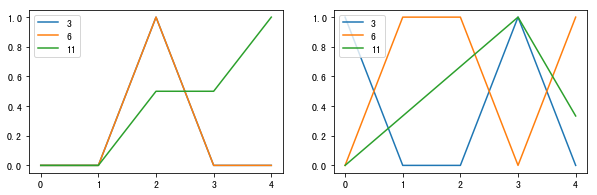

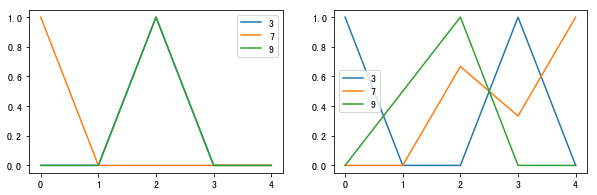

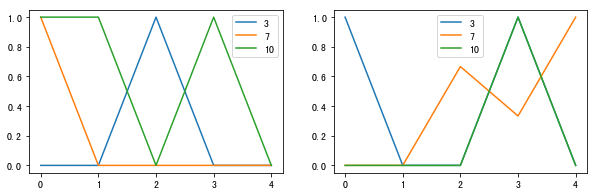

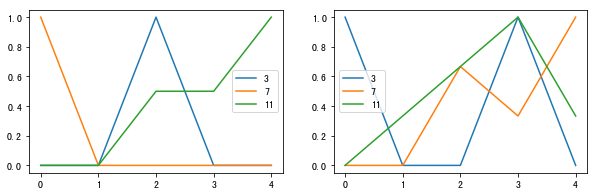

In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

for d in [[x, y, z] for x in range(4) for y in range(4, 8) for z in range(9, 12)]:
    
    fig = plt.figure(figsize=(10, 3))
    
    ax1 = fig.add_subplot(1,2,1)
    data = scaler.fit_transform(np.array(task_counts_1)[d, :].T)
    plt.plot(data)
    plt.legend(d)

    ax2 = fig.add_subplot(1,2,2)
    data = scaler.fit_transform(np.array(task_counts)[d, :].T)
    plt.plot(data)
    plt.legend(d)
    
    name = '+'.join([str(x) for x in d])
    fig.savefig('task_counts/'+name+'.jpg')

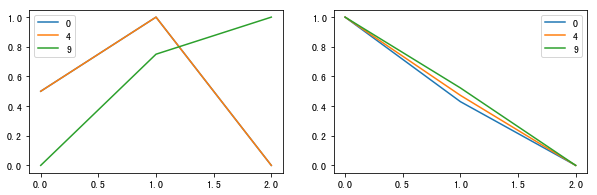

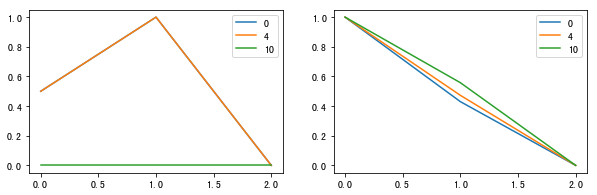

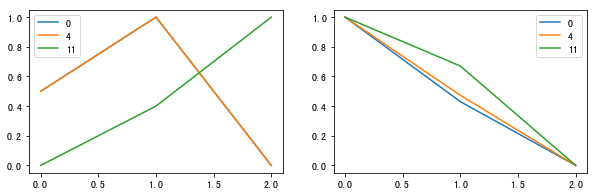

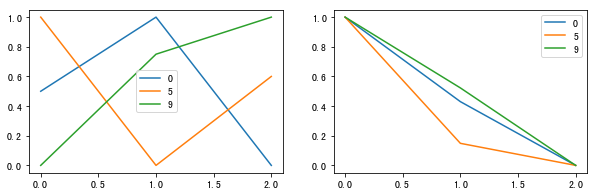

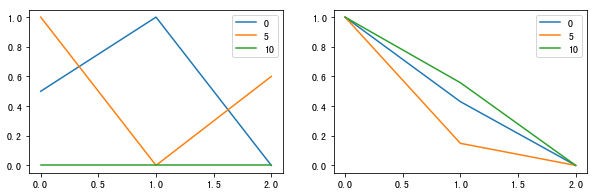

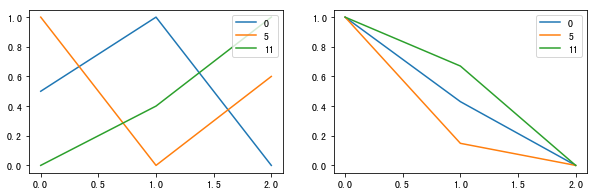

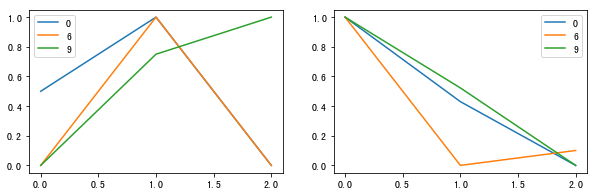

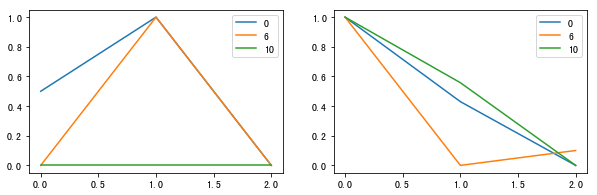

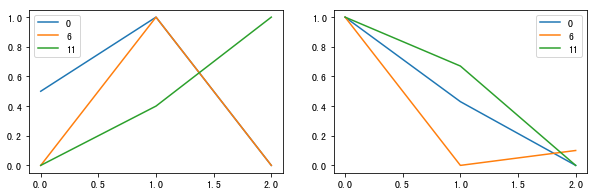

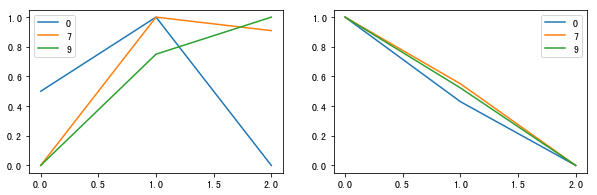

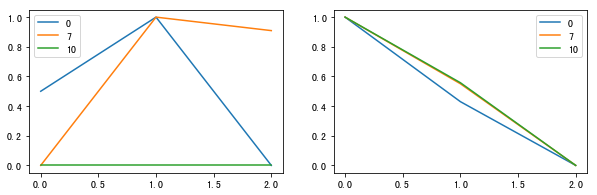

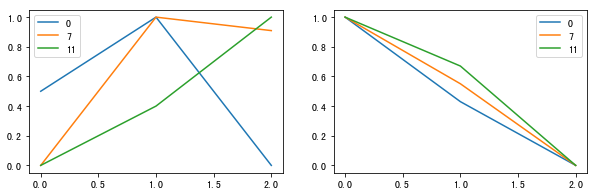

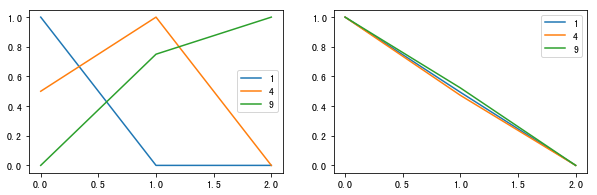

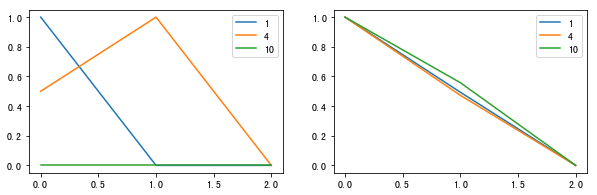

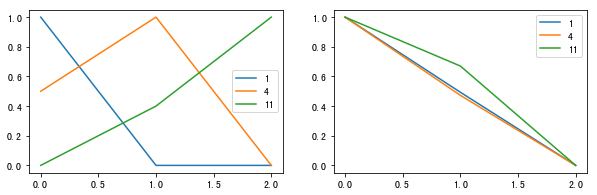

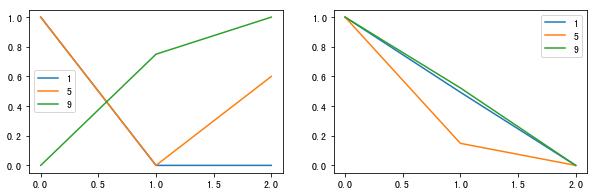

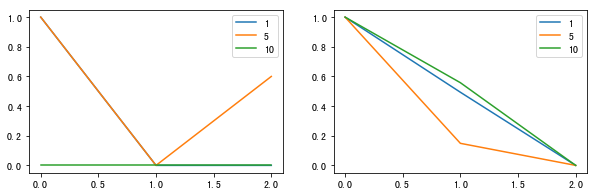

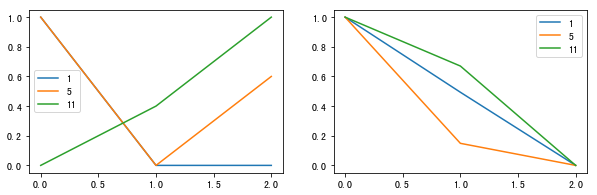

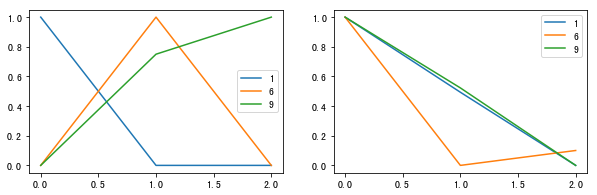

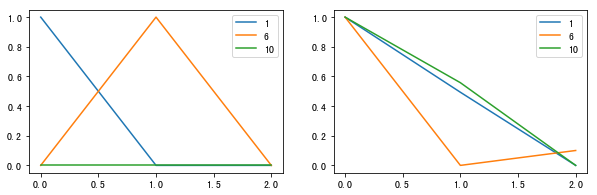

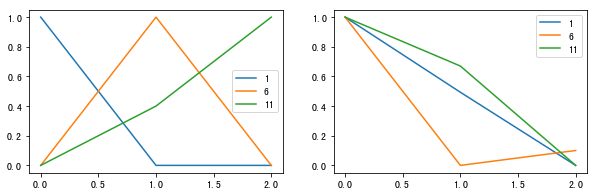

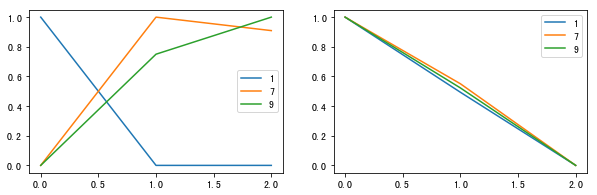

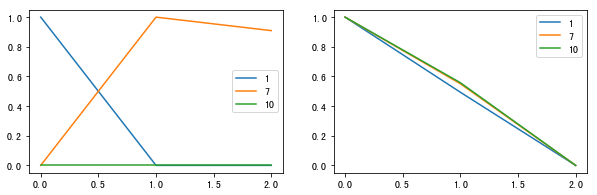

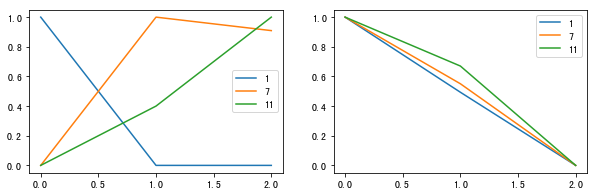

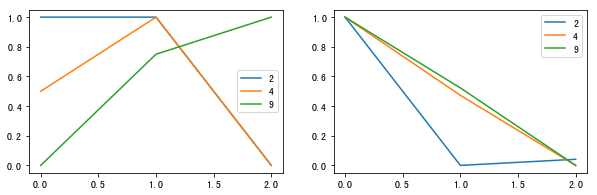

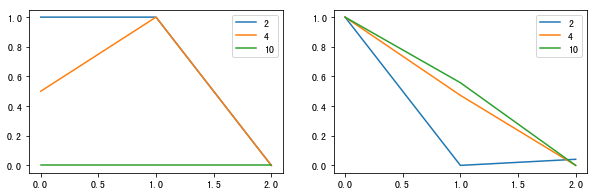

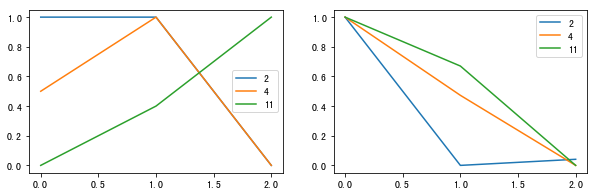

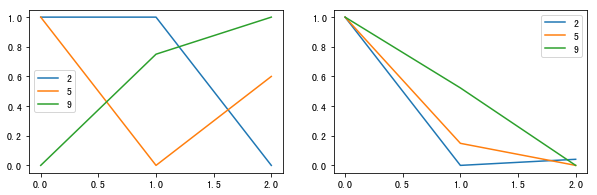

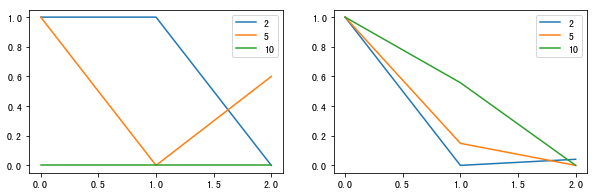

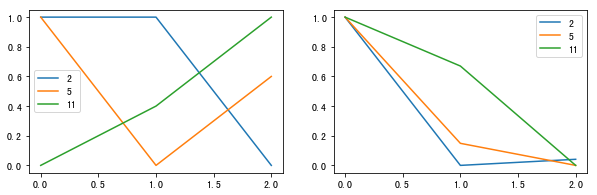

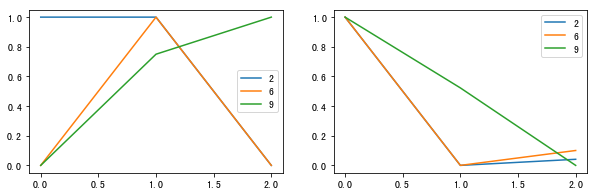

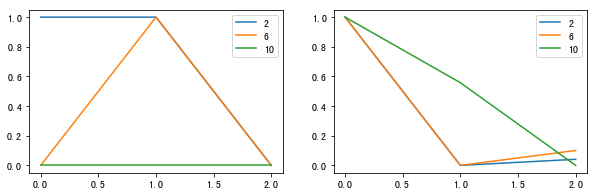

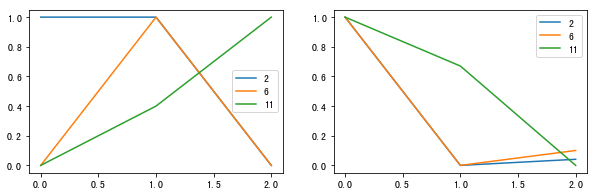

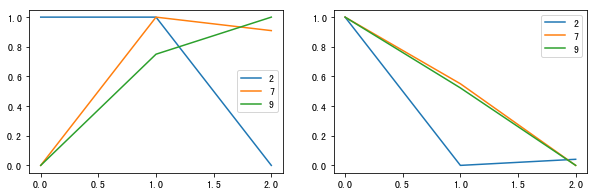

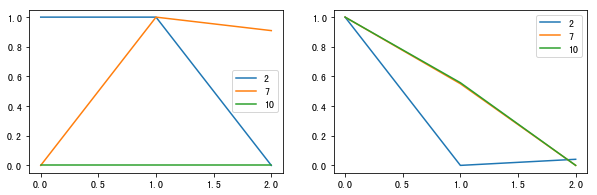

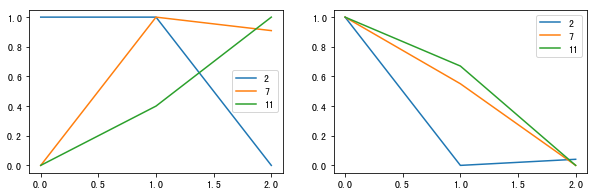

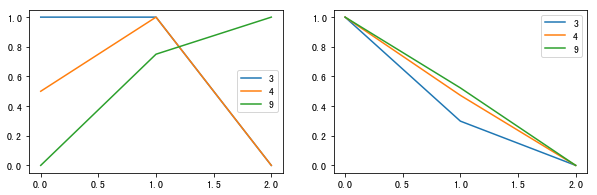

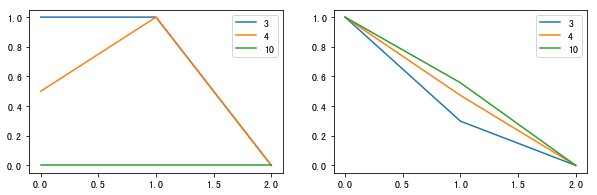

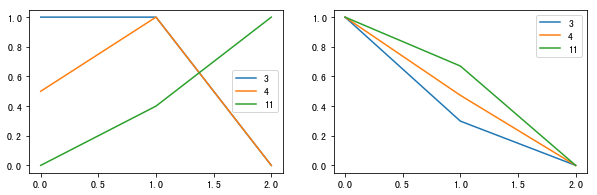

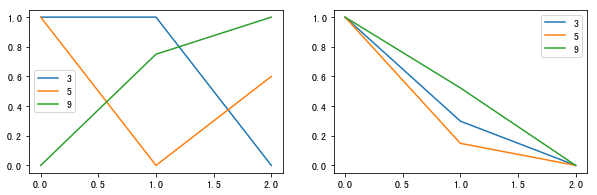

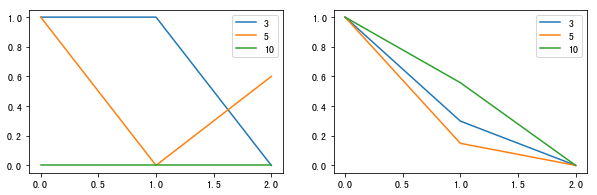

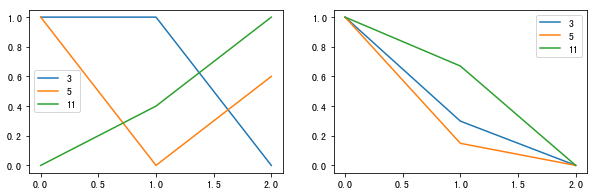

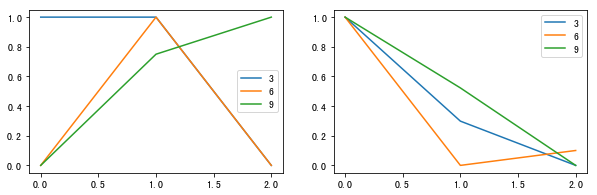

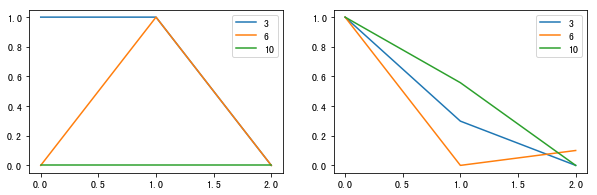

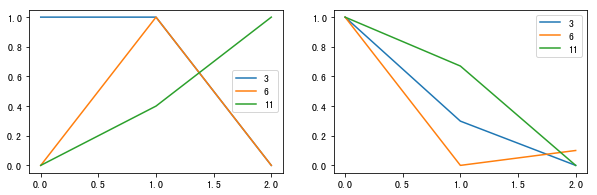

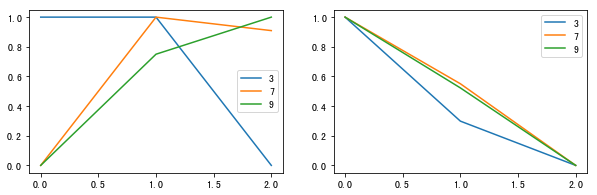

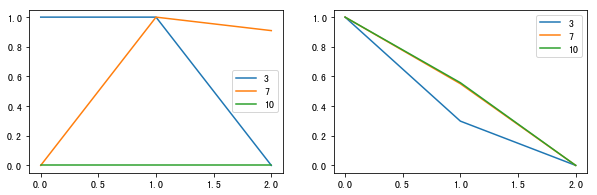

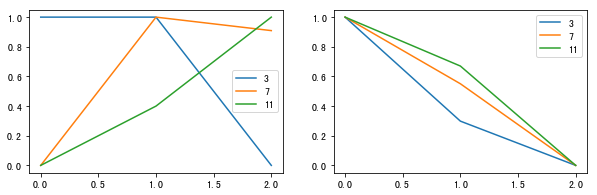

In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

for d in [[x, y, z] for x in range(4) for y in range(4, 8) for z in range(9, 12)]:
    
    fig = plt.figure(figsize=(10, 3))
    
    ax1 = fig.add_subplot(1,2,1)
    data = scaler.fit_transform(np.array(human_trusts)[d, :].T)
    plt.plot(data)
    plt.legend(d)

    ax2 = fig.add_subplot(1,2,2)
    data = scaler.fit_transform(np.array(human_trusts_1)[d, :].T)
    plt.plot(data)
    plt.legend(d)
    
    name = '+'.join(str(d))
    fig.savefig('human_trusts/'+name+'.jpg')

1. 不同参数设置下的tic

In [51]:
tic_tru = []
for i in range(12):
    y1 = np.array(human_trusts[i])
    y2 = np.array(human_trusts_1[i])
    tic_tru.append(tic(y1, y2))
    
tic_ent = []
for i in range(12):
    y1 = np.array(human_actions[i])
    y2 = np.array(human_actions_1[i])
    tic_ent.append(tic(y1, y2))

tic_task = []
for i in range(12):
    y1 = np.array(task_counts[i])
    y2 = np.array(task_counts_1[i])
    tic_task.append(tic(y1, y2))

In [52]:
np.array(tic_tru).round(decimals=6).reshape(3, 4)

array([[0.300683, 0.305427, 0.349514, 0.194061],
       [0.249873, 0.058028, 0.56509 , 0.714961],
       [0.701701, 0.579897, 1.      , 0.635224]])

In [53]:
np.array(tic_ent).round(decimals=6).reshape(3, 4)

array([[0.255916, 0.170556, 0.567251, 1.      ],
       [0.434752, 0.554722, 0.449496, 0.568953],
       [0.205624, 0.164394, 0.472013, 0.468289]])

In [54]:
np.array(tic_task).round(decimals=6).reshape(3, 4)

array([[0.316404,      nan, 1.      , 1.      ],
       [0.408882, 0.710706, 0.317837, 0.548715],
       [0.57735 , 0.236068, 0.414214, 0.369657]])

2. 按照机器人适应性加和tic

In [10]:
def print_tic(x, y):
    y1 = np.array(human_actions)[x:y, :].sum(axis=0)
    y2 = np.array(human_actions_1)[x:y, :].sum(axis=0)
    tic1 = tic(y1, y2)

    y1 = np.array(human_trusts)[x:y, :].sum(axis=0)
    y2 = np.array(human_trusts_1)[x:y, :].sum(axis=0)
    tic2 = tic(y1, y2)

    y1 = np.array(task_counts)[x:y, :].sum(axis=0)
    y2 = np.array(task_counts_1)[x:y, :].sum(axis=0)
    tic3 = tic(y1, y2)
#     print('%.2f\t%.2f\t%.2f' % (tic1, tic2, tic3))
#     return np.array([tic1, tic2, tic3])

#     print('%.2f\t%.2f' % (tic1, tic3))
    return np.array([tic1, tic3])

In [13]:
tic(np.array([1,1,1,1,2]), np.array([1,1,1,1,1]))

1.0